In [243]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 12})

-----
## Ledvičkeee
-----

In [244]:
# Data

df = pd.read_csv('data/ledvice.dat', sep='\t')
ts = df['t[čas]']
Ns = df['N[sunkov na detektorju]']
Ns_err = np.sqrt(Ns)

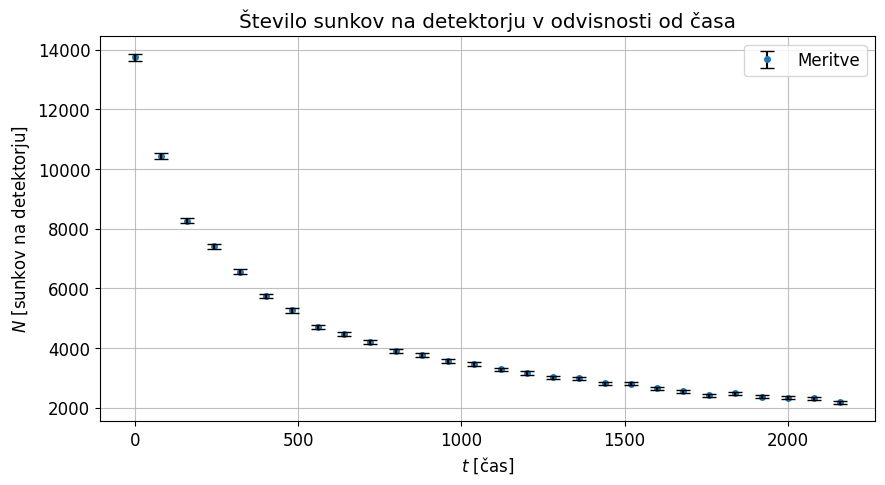

In [245]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_title('Število sunkov na detektorju v odvisnosti od časa')
ax.set_xlabel(r'$t$ [čas]')
ax.set_ylabel(r'$N$ [sunkov na detektorju]')
ax.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax.legend()

In [246]:
# Model functions

def linear(t, a, b):
    return a*t + b


def enorazdelcni(t, A, a):
    return A*np.exp(-a*t)


def enorazdelcni_ozadje(t, A, a, C):
    return A*np.exp(-a*t) + C


def dvorazdelcni(t, A, a, B, b):
    return A*np.exp(-a*t) + B*np.exp(-b*t)


def dvorazdelcni_ozadje(t, A, a, B, b, C):
    return A*np.exp(-a*t) + B*np.exp(-b*t) + C


def zapleten(t, A, a, B, b, C):
    return A*np.exp(-a*np.sqrt(t)) + B*np.exp(-b*np.sqrt(t)) + C

def enostavnejsi(t, A, a, C):
    return A*np.exp(-a*np.sqrt(t)) + C

### Enorazdelčni model

In [247]:
# Linearizacija

tildeNs = np.log(Ns)
tildeNs_err = 1/np.sqrt(Ns)

In [248]:
# Curve fitting

popt1, pcov1 = curve_fit(linear, ts, tildeNs, sigma=tildeNs_err, absolute_sigma=True, method='lm')

a_opt1 = popt1[0]
a_err1 = np.sqrt(pcov1[0][0])
tildeA_opt = popt1[1]
tildeA_err = np.sqrt(pcov1[1][1])

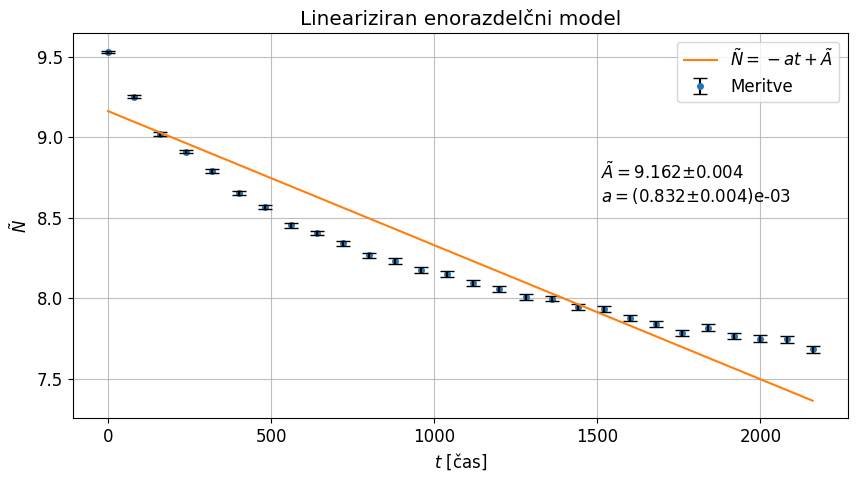

In [268]:
# Plotting

tildeNs_opt = linear(ts, a_opt1, tildeA_opt)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_title('Lineariziran enorazdelčni model')
ax.set_xlabel(r'$t$ [čas]')
ax.set_ylabel(r'$\tilde{N}$')
ax.errorbar(ts, tildeNs, yerr=tildeNs_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax.plot(ts, tildeNs_opt, label=r'$\tilde{N} = -at + \tilde{A}$')
ax.text(1510, 8.6,
        r'$\tilde{A}=$' + f'{round(tildeA_opt, 3):.3f}' + r'$\pm$' + f'{round(tildeA_err, 3):.3f}\n'
        + r'$a=$' + f'({round(-1000*a_opt1, 3):.3f}' + r'$\pm$' + f'{round(1000*a_err1, 3):.3f})' + r'e-03')
ax.legend()

In [250]:
# Pravi parametri

A_opt1 = np.exp(tildeA_opt)
A_err1 = np.exp(tildeA_opt)*tildeA_err

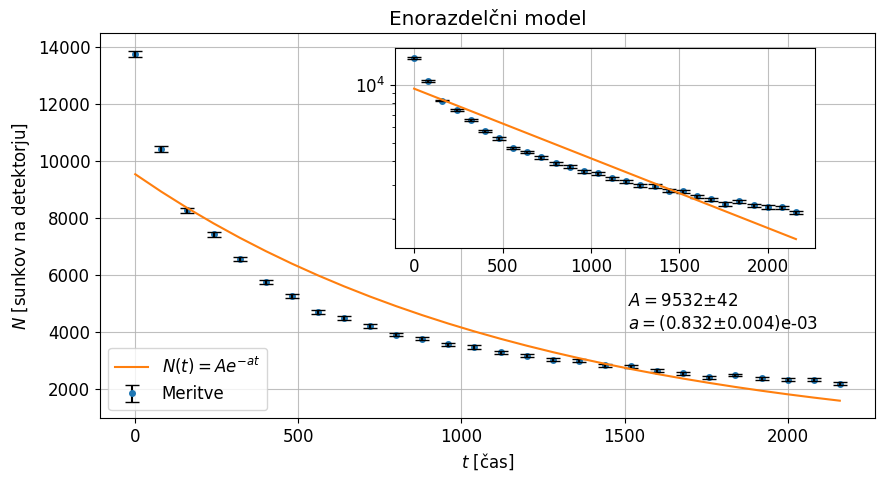

In [251]:
# Plotting

Ns_opt1 = enorazdelcni(ts, A_opt1, -a_opt1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_title('Enorazdelčni model')
ax.set_xlabel(r'$t$ [čas]')
ax.set_ylabel(r'$N$ [sunkov na detektorju]')
ax.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax.plot(ts, Ns_opt1, label=r'$N(t) = Ae^{-at}$')
ax.text(1510, 4100,
        r'$A=$' + f'{round(A_opt1, 3):.0f}' + r'$\pm$' + f'{round(A_err1, 3):.0f}\n'
        + r'$a=$' + f'({round(-1000*a_opt1, 3):.3f}' + r'$\pm$' + f'{round(1000*a_err1, 3):.3f})' + r'e-03')
ax.legend(loc='lower left')

ax_inset = fig.add_axes([0.42, 0.45, 0.42, 0.40])  # Adjust the values as needed
ax_inset.grid(alpha=0.8)
ax_inset.set_yscale('log')
ax_inset.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax_inset.plot(ts, Ns_opt1, label=r'$N(t) = Ae^{-at}$')

- enorazdelčni z ozadjem

In [252]:
# Curve fitting

popt2, pcov2 = curve_fit(enorazdelcni_ozadje, ts, Ns, p0=[10000., 0.01, 2000.], sigma=Ns_err, absolute_sigma=True, method='lm')

A_opt2 = popt2[0]
A_err2 = np.sqrt(pcov2[0][0])
a_opt2 = popt2[1]
a_err2 = np.sqrt(pcov2[1][1])
C_opt2 = popt2[2]
C_err2 = np.sqrt(pcov2[2][2])

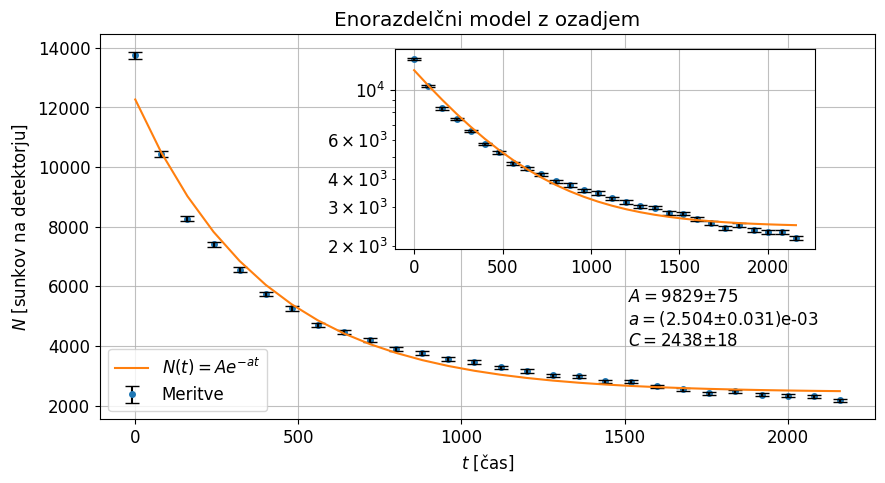

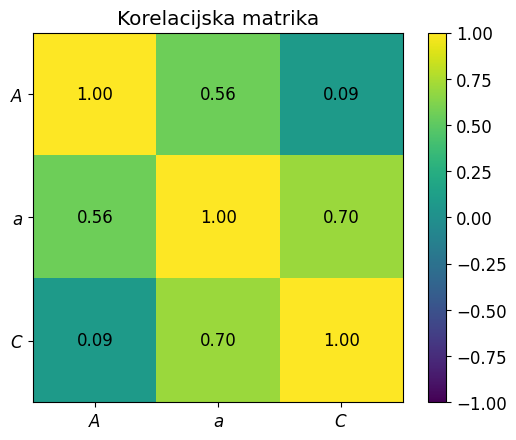

In [253]:
# Plotting

Ns_opt2 = enorazdelcni_ozadje(ts, A_opt2, a_opt2, C_opt2)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_title('Enorazdelčni model z ozadjem')
ax.set_xlabel(r'$t$ [čas]')
ax.set_ylabel(r'$N$ [sunkov na detektorju]')
ax.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax.plot(ts, Ns_opt2, label=r'$N(t) = Ae^{-at}$')
ax.text(1510, 3300,
        r'$A=$' + f'{round(A_opt2, 3):.0f}' + r'$\pm$' + f'{round(A_err2, 3):.0f}\n'
        + r'$a=$' + f'({round(1000*a_opt2, 3):.3f}' + r'$\pm$' + f'{round(1000*a_err2, 3):.3f})' + r'e-03' + f'\n'
        + r'$C=$' + f'{round(C_opt2, 3):.0f}' + r'$\pm$' + f'{round(C_err2, 3):.0f}\n')
ax.legend(loc='lower left')

ax_inset = fig.add_axes([0.42, 0.45, 0.42, 0.40])  # Adjust the values as needed
ax_inset.grid(alpha=0.8)
ax_inset.set_yscale('log')
ax_inset.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax_inset.plot(ts, Ns_opt2, label=r'$N(t) = Ae^{-at} + C$')

plt.show()

# Calculate the standard deviations
std_devs = np.sqrt(np.diag(pcov2))

# Create the correlation matrix
pcor = pcov2 / np.outer(std_devs, std_devs)

# Labels for x and y ticks
tick_labels = [r'$A$', r'$a$', r'$C$']

# Plotting the correlation matrix
plt.imshow(pcor, cmap='viridis', vmin=-1, vmax=1, interpolation='nearest')

# Adding x and y tick labels
plt.xticks(np.arange(len(tick_labels)), tick_labels)
plt.yticks(np.arange(len(tick_labels)), tick_labels)

# Adding annotations with values
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        plt.text(j, i, f'{pcor[i, j]:.2f}', ha='center', va='center', color='black')

# Adding labels and title
plt.title('Korelacijska matrika')

# Adding colorbar
plt.colorbar()

### Dvorazdelčni

- Dvorazdelčni brez ozadja

In [254]:
# Curve fitting

popt3, pcov3 = curve_fit(dvorazdelcni, ts, Ns, p0=[10000., 0.01, 8000., 0.01], sigma=Ns_err, absolute_sigma=True, method='lm')

A_opt3 = popt3[0]
A_err3 = np.sqrt(pcov3[0][0])
a_opt3 = popt3[1]
a_err3 = np.sqrt(pcov3[1][1])
B_opt3 = popt3[2]
B_err3 = np.sqrt(pcov3[2][2])
b_opt3 = popt3[3]
b_err3 = np.sqrt(pcov3[3][3])

c:\Users\Tadej\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


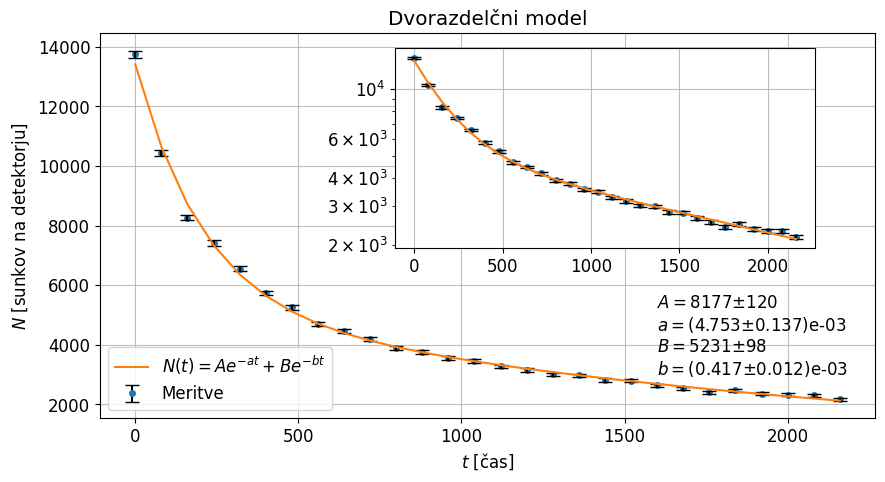

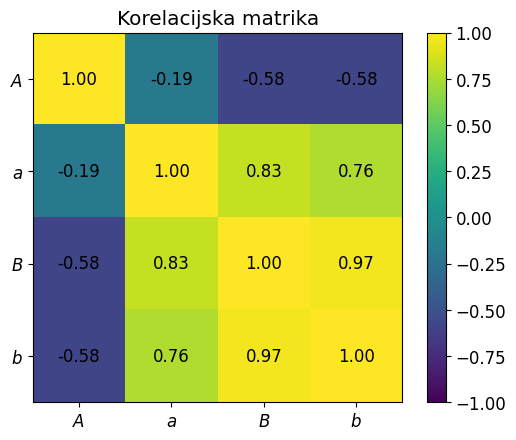

In [255]:
# Plotting

Ns_opt3 = dvorazdelcni(ts, A_opt3, a_opt3, B_opt3, b_opt3)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_title('Dvorazdelčni model')
ax.set_xlabel(r'$t$ [čas]')
ax.set_ylabel(r'$N$ [sunkov na detektorju]')
ax.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax.plot(ts, Ns_opt3, label=r'$N(t) = Ae^{-at} + Be^{-bt}$')
ax.text(1600, 3000,
        r'$A=$' + f'{round(A_opt3, 3):.0f}' + r'$\pm$' + f'{round(A_err3, 3):.0f}\n'
        + r'$a=$' + f'({round(1000*a_opt3, 3):.3f}' + r'$\pm$' + f'{round(1000*a_err3, 3):.3f})' + r'e-03' + f'\n'
        + r'$B=$' + f'{round(B_opt3, 3):.0f}' + r'$\pm$' + f'{round(B_err3, 3):.0f}\n'
        + r'$b=$' + f'({round(1000*b_opt3, 3):.3f}' + r'$\pm$' + f'{round(1000*b_err3, 3):.3f})' + r'e-03')
ax.legend(loc='lower left')

ax_inset = fig.add_axes([0.42, 0.45, 0.42, 0.40])  # Adjust the values as needed
ax_inset.grid(alpha=0.8)
ax_inset.set_yscale('log')
ax_inset.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax_inset.plot(ts, Ns_opt3, label=r'$N(t) = Ae^{-at}$')

plt.show()

# Calculate the standard deviations
std_devs = np.sqrt(np.diag(pcov3))

# Create the correlation matrix
pcor = pcov3 / np.outer(std_devs, std_devs)

# Labels for x and y ticks
tick_labels = [r'$A$', r'$a$', r'$B$', r'$b$']

# Plotting the correlation matrix
plt.imshow(pcor, cmap='viridis', vmin=-1, vmax=1, interpolation='nearest')

# Adding x and y tick labels
plt.xticks(np.arange(len(tick_labels)), tick_labels)
plt.yticks(np.arange(len(tick_labels)), tick_labels)

# Adding annotations with values
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        plt.text(j, i, f'{pcor[i, j]:.2f}', ha='center', va='center', color='black')

# Adding labels and title
plt.title('Korelacijska matrika')

# Adding colorbar
plt.colorbar()

- Dvorazdelčni z ozadjem

In [256]:
# Curve fitting

popt4, pcov4 = curve_fit(dvorazdelcni_ozadje, ts, Ns, p0=[10000., 0.01, 8000., 0.01, 2000.], sigma=Ns_err, absolute_sigma=True, method='lm')

A_opt4 = popt4[0]
A_err4 = np.sqrt(pcov4[0][0])
a_opt4 = popt4[1]
a_err4 = np.sqrt(pcov4[1][1])
B_opt4 = popt4[2]
B_err4 = np.sqrt(pcov4[2][2])
b_opt4 = popt4[3]
b_err4 = np.sqrt(pcov4[3][3])
C_opt4 = popt4[4]
C_err4 = np.sqrt(pcov4[4][4])

c:\Users\Tadej\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


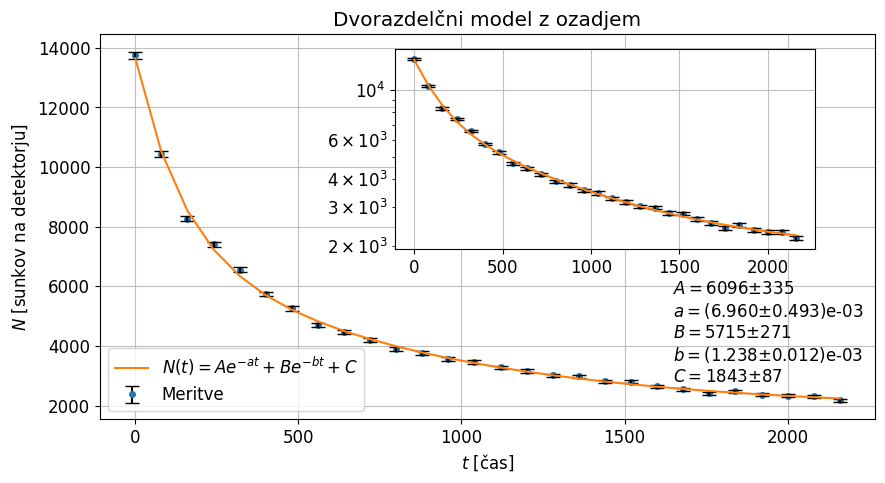

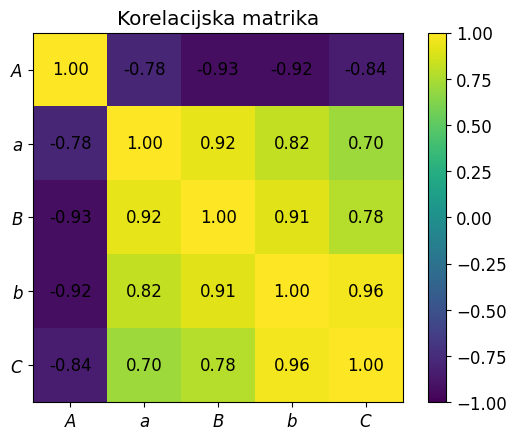

In [257]:
# Plotting

Ns_opt4 = dvorazdelcni_ozadje(ts, A_opt4, a_opt4, B_opt4, b_opt4, C_opt4)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_title('Dvorazdelčni model z ozadjem')
ax.set_xlabel(r'$t$ [čas]')
ax.set_ylabel(r'$N$ [sunkov na detektorju]')
ax.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax.plot(ts, Ns_opt4, label=r'$N(t) = Ae^{-at} + Be^{-bt} + C$')
ax.text(1650, 2800,
        r'$A=$' + f'{round(A_opt4, 3):.0f}' + r'$\pm$' + f'{round(A_err4, 3):.0f}\n'
        + r'$a=$' + f'({round(1000*a_opt4, 3):.3f}' + r'$\pm$' + f'{round(1000*a_err4, 3):.3f})' + r'e-03' + f'\n'
        + r'$B=$' + f'{round(B_opt4, 3):.0f}' + r'$\pm$' + f'{round(B_err4, 3):.0f}\n'
        + r'$b=$' + f'({round(1000*b_opt4, 3):.3f}' + r'$\pm$' + f'{round(1000*b_err3, 3):.3f})' + r'e-03' + f'\n'
        + r'$C=$' + f'{round(C_opt4, 3):.0f}' + r'$\pm$' + f'{round(C_err4, 3):.0f}')
ax.legend(loc='lower left')

ax_inset = fig.add_axes([0.42, 0.45, 0.42, 0.40])  # Adjust the values as needed
ax_inset.grid(alpha=0.8)
ax_inset.set_yscale('log')
ax_inset.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax_inset.plot(ts, Ns_opt4)

plt.show()

# Calculate the standard deviations
std_devs = np.sqrt(np.diag(pcov4))

# Create the correlation matrix
pcor = pcov4 / np.outer(std_devs, std_devs)

# Labels for x and y ticks
tick_labels = [r'$A$', r'$a$', r'$B$', r'$b$', r'$C$']

# Plotting the correlation matrix
plt.imshow(pcor, cmap='viridis', vmin=-1, vmax=1, interpolation='nearest')

# Adding x and y tick labels
plt.xticks(np.arange(len(tick_labels)), tick_labels)
plt.yticks(np.arange(len(tick_labels)), tick_labels)

# Adding annotations with values
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        plt.text(j, i, f'{pcor[i, j]:.2f}', ha='center', va='center', color='black')

# Adding labels and title
plt.title('Korelacijska matrika')

# Adding colorbar
plt.colorbar()

### Zapleten model

In [269]:
# Curve fitting

popt5, pcov5 = curve_fit(zapleten, ts, Ns, p0=[8000., 0.1, 8000., 0.1, 2000.], sigma=Ns_err, absolute_sigma=True, method='lm')

A_opt5 = popt5[0]
A_err5 = np.sqrt(pcov5[0][0])
a_opt5 = popt5[1]
a_err5 = np.sqrt(pcov5[1][1])
B_opt5 = popt5[2]
B_err5 = np.sqrt(pcov5[2][2])
b_opt5 = popt5[3]
b_err5 = np.sqrt(pcov5[3][3])
C_opt5 = popt5[4]
C_err5 = np.sqrt(pcov5[4][4])

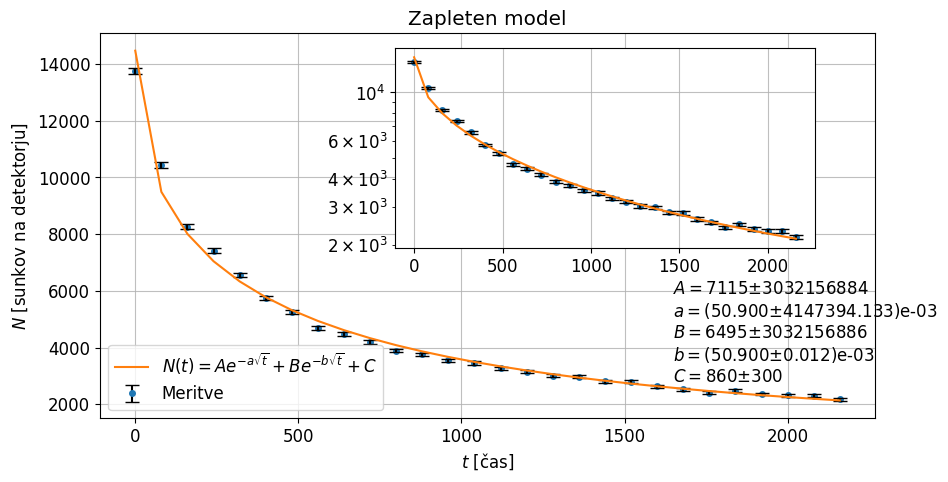

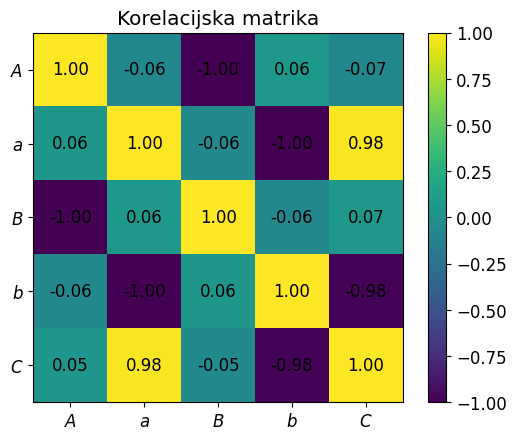

In [270]:
# Plotting

Ns_opt5 = zapleten(ts, A_opt5, a_opt5, B_opt5, b_opt5, C_opt5)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_title('Zapleten model')
ax.set_xlabel(r'$t$ [čas]')
ax.set_ylabel(r'$N$ [sunkov na detektorju]')
ax.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax.plot(ts, Ns_opt5, label=r'$N(t) = Ae^{-a\sqrt{t}} + Be^{-b\sqrt{t}} + C$')
ax.text(1650, 2800,
        r'$A=$' + f'{round(A_opt5, 3):.0f}' + r'$\pm$' + f'{round(A_err5, 3):.0f}\n'
        + r'$a=$' + f'({round(1000*a_opt5, 3):.3f}' + r'$\pm$' + f'{round(1000*a_err5, 3):.3f})' + r'e-03' + f'\n'
        + r'$B=$' + f'{round(B_opt5, 3):.0f}' + r'$\pm$' + f'{round(B_err5, 3):.0f}\n'
        + r'$b=$' + f'({round(1000*b_opt5, 3):.3f}' + r'$\pm$' + f'{round(1000*b_err3, 3):.3f})' + r'e-03' + f'\n'
        + r'$C=$' + f'{round(C_opt5, 3):.0f}' + r'$\pm$' + f'{round(C_err5, 3):.0f}')
ax.legend(loc='lower left')

ax_inset = fig.add_axes([0.42, 0.45, 0.42, 0.40])  # Adjust the values as needed
ax_inset.grid(alpha=0.8)
ax_inset.set_yscale('log')
ax_inset.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax_inset.plot(ts, Ns_opt5)

plt.show()

# Calculate the standard deviations
std_devs = np.sqrt(np.diag(pcov5))

# Create the correlation matrix
pcor = pcov5 / np.outer(std_devs, std_devs)

# Labels for x and y ticks
tick_labels = [r'$A$', r'$a$', r'$B$', r'$b$', r'$C$']

# Plotting the correlation matrix
plt.imshow(pcor, cmap='viridis', vmin=-1, vmax=1, interpolation='nearest')

# Adding x and y tick labels
plt.xticks(np.arange(len(tick_labels)), tick_labels)
plt.yticks(np.arange(len(tick_labels)), tick_labels)

# Adding annotations with values
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        plt.text(j, i, f'{pcor[i, j]:.2f}', ha='center', va='center', color='black')

# Adding labels and title
plt.title('Korelacijska matrika')

# Adding colorbar
plt.colorbar()

### Enostavnejši model

In [260]:
# Curve fitting

popt6, pcov6 = curve_fit(enostavnejsi, ts, Ns, p0=[10000., 0.1, 2000.], sigma=Ns_err, absolute_sigma=True, method='lm')

A_opt6 = popt6[0]
A_err6 = np.sqrt(pcov6[0][0])
a_opt6 = popt6[1]
a_err6 = np.sqrt(pcov6[1][1])
C_opt6 = popt6[2]
C_err6 = np.sqrt(pcov6[2][2])

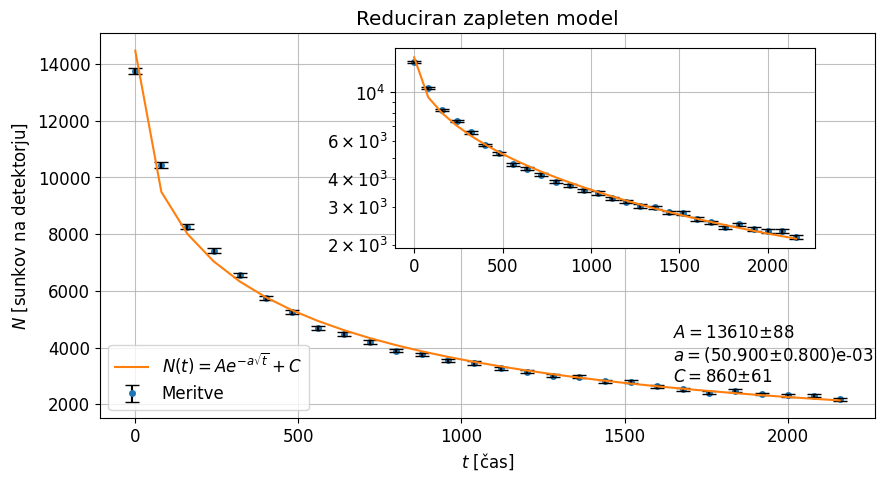

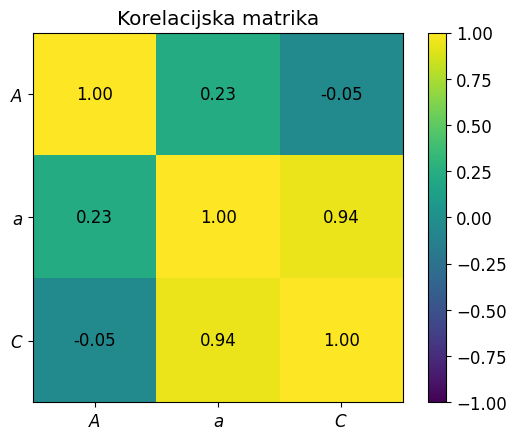

In [261]:
# Plotting

Ns_opt6 = enostavnejsi(ts, A_opt6, a_opt6, C_opt6)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_title('Reduciran zapleten model')
ax.set_xlabel(r'$t$ [čas]')
ax.set_ylabel(r'$N$ [sunkov na detektorju]')
ax.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax.plot(ts, Ns_opt6, label=r'$N(t) = Ae^{-a\sqrt{t}} + C$')
ax.text(1650, 2800,
        r'$A=$' + f'{round(A_opt6, 3):.0f}' + r'$\pm$' + f'{round(A_err6, 3):.0f}\n'
        + r'$a=$' + f'({round(1000*a_opt6, 3):.3f}' + r'$\pm$' + f'{round(1000*a_err6, 3):.3f})' + r'e-03' + f'\n'
        + r'$C=$' + f'{round(C_opt6, 3):.0f}' + r'$\pm$' + f'{round(C_err6, 3):.0f}')
ax.legend(loc='lower left')

ax_inset = fig.add_axes([0.42, 0.45, 0.42, 0.40])  # Adjust the values as needed
ax_inset.grid(alpha=0.8)
ax_inset.set_yscale('log')
ax_inset.errorbar(ts, Ns, yerr=Ns_err, fmt='.', markersize=8, capsize=5, barsabove=True, ecolor='black', label='Meritve')
ax_inset.plot(ts, Ns_opt6)

plt.show()

# Calculate the standard deviations
std_devs = np.sqrt(np.diag(pcov6))

# Create the correlation matrix
pcor = pcov6 / np.outer(std_devs, std_devs)

# Labels for x and y ticks
tick_labels = [r'$A$', r'$a$', r'$C$']

# Plotting the correlation matrix
plt.imshow(pcor, cmap='viridis', vmin=-1, vmax=1, interpolation='nearest')

# Adding x and y tick labels
plt.xticks(np.arange(len(tick_labels)), tick_labels)
plt.yticks(np.arange(len(tick_labels)), tick_labels)

# Adding annotations with values
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        plt.text(j, i, f'{pcor[i, j]:.2f}', ha='center', va='center', color='black')

# Adding labels and title
plt.title('Korelacijska matrika')

# Adding colorbar
plt.colorbar()

### Vrednosti chi2

In [262]:
chi21 = np.sum(((Ns-Ns_opt1)/Ns_err)**2 / (len(Ns)-2))
chi22 = np.sum(((Ns-Ns_opt2)/Ns_err)**2 / (len(Ns)-3))
chi23 = np.sum(((Ns-Ns_opt3)/Ns_err)**2 / (len(Ns)-4))
chi24 = np.sum(((Ns-Ns_opt4)/Ns_err)**2 / (len(Ns)-5))
chi25 = np.sum(((Ns-Ns_opt5)/Ns_err)**2 / (len(Ns)-5))
chi26 = np.sum(((Ns-Ns_opt6)/Ns_err)**2 / (len(Ns)-3))

chi2 = [chi21, chi22, chi23, chi24, chi25, chi26]
model = ['Enorazdelčni',
'Enorazdelčni z ozadjem',
'Dvorazdelčni',
'Dvorazdelčni z ozadjem',
'Zapleten',
'Reduciran zapleten'
]

df = pd.DataFrame(
    {
        'Model': model,
        r'\chi^2': chi2
    }
)

print(df.to_latex())

\begin{tabular}{llr}
\toprule
{} &                   Model &      \textbackslash chi\textasciicircum 2 \\
\midrule
0 &            Enorazdelčni &  169.877445 \\
1 &  Enorazdelčni z ozadjem &   20.851425 \\
2 &            Dvorazdelčni &    3.024417 \\
3 &  Dvorazdelčni z ozadjem &    1.736528 \\
4 &                Zapleten &    9.260113 \\
5 &      Reduciran zapleten &    8.519304 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_9088\1718487448.py:24: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())
